<a href="https://colab.research.google.com/github/royal-dit/ML-algorithms/blob/main/breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np 
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv('/content/Breast_Cancer.csv')

In [ ]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [ ]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [ ]:
!pip install klib

In [ ]:
import klib

GridSpec(6, 11)

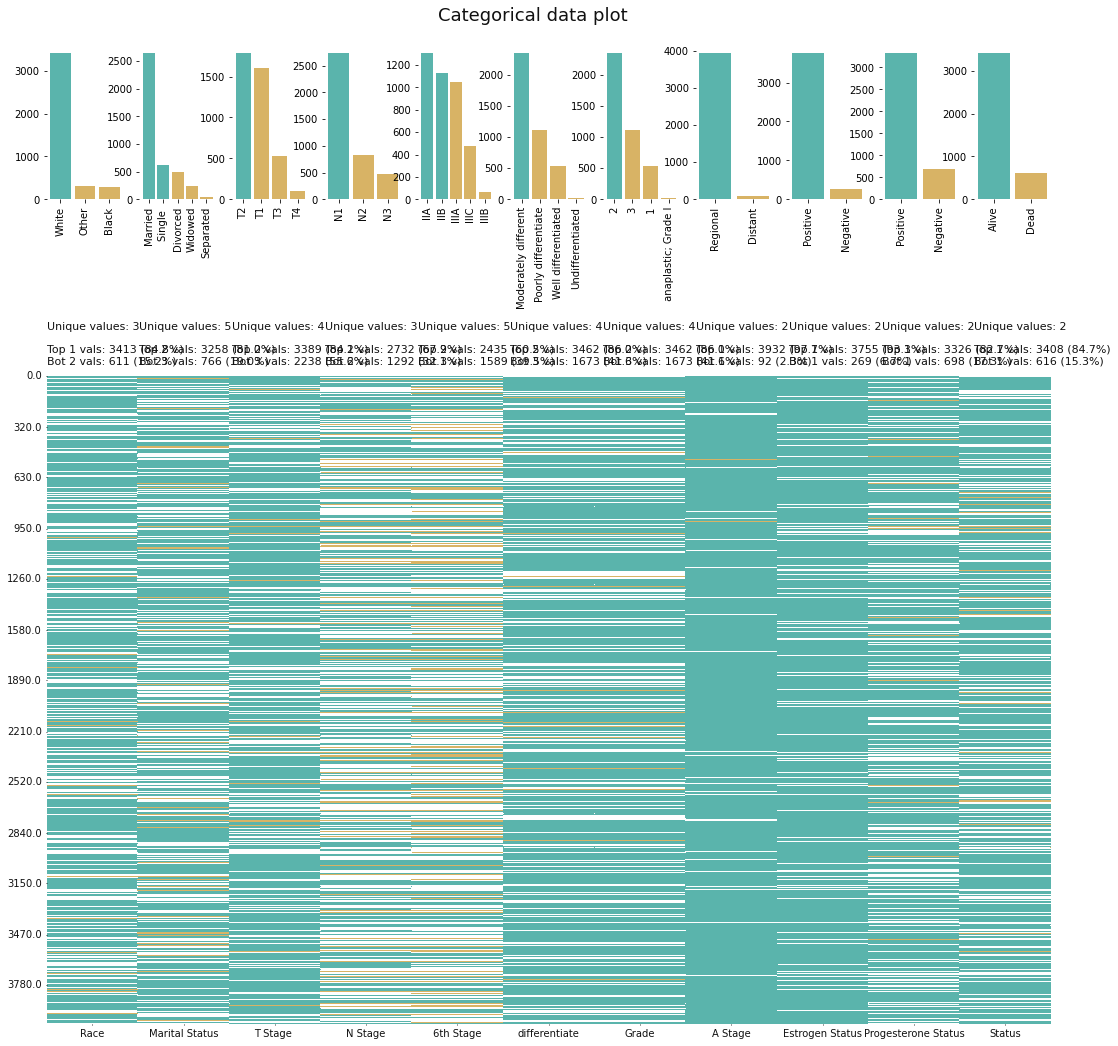

In [ ]:
klib.cat_plot(df)

In [ ]:
klib.corr_mat(df)

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
Age,1.00,-0.08,-0.03,0.01,-0.01
Tumor Size,-0.08,1.00,0.10,0.24,-0.09
Regional Node Examined,-0.03,0.10,1.00,0.41,-0.02
Reginol Node Positive,0.01,0.24,0.41,1.00,-0.14
Survival Months,-0.01,-0.09,-0.02,-0.14,1.00


#preprocessing the Task

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df = df.apply(le.fit_transform)
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,38,2,1,0,0,0,1,3,1,3,1,1,23,0,59,0
1,20,2,1,1,1,2,0,2,1,34,1,1,13,4,61,0
2,28,2,0,2,2,4,0,2,1,62,1,1,13,6,74,0
3,28,2,1,0,0,0,1,3,1,17,1,1,1,0,83,0
4,17,2,1,1,0,1,1,3,1,40,1,1,2,0,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,32,1,1,0,0,0,0,2,1,8,1,1,0,0,48,0
4020,26,2,0,1,1,2,0,2,1,45,1,1,13,7,68,0
4021,38,2,1,1,0,1,0,2,1,21,1,0,10,2,68,0
4022,28,0,0,1,0,1,0,2,1,43,1,1,10,0,71,0


#bringing all values between 0 and 1

In [ ]:
for i in df.columns[0:]:
  df[i] =(df[i]-df[i].min())/(df[i].max()-df[i].min())

In [ ]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,0.974359,1.0,0.25,0.000000,0.0,0.00,0.333333,1.000000,1.0,0.027523,1.0,1.0,0.433962,0.000000,0.556604,0.0
1,0.512821,1.0,0.25,0.333333,0.5,0.50,0.000000,0.666667,1.0,0.311927,1.0,1.0,0.245283,0.108108,0.575472,0.0
2,0.717949,1.0,0.00,0.666667,1.0,1.00,0.000000,0.666667,1.0,0.568807,1.0,1.0,0.245283,0.162162,0.698113,0.0
3,0.717949,1.0,0.25,0.000000,0.0,0.00,0.333333,1.000000,1.0,0.155963,1.0,1.0,0.018868,0.000000,0.783019,0.0
4,0.435897,1.0,0.25,0.333333,0.0,0.25,0.333333,1.000000,1.0,0.366972,1.0,1.0,0.037736,0.000000,0.462264,0.0


In [ ]:
df.shape

(4024, 16)

In [ ]:
df['Status'].describe()

count    4024.000000
mean        0.153082
std         0.360111
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Status, dtype: float64

In [ ]:
X = df.drop('Status',axis = 1)

In [ ]:
y = df["Status"]

In [ ]:
X.shape

(4024, 15)

In [ ]:
y.shape

(4024,)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size =0.2)


#linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression()
reg = reg.fit(X,y)
y_pred = reg.predict(X)
r2_score = reg.score(X,y)
print(r2_score)

0.3002002082481142


#logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred  = log_reg.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.893167701863354

#using ANN

In [ ]:

model  = Sequential([
    tf.keras.layers.Dense(1000,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])
model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy']
              )
model.fit (X_train,y_train,epochs = 150)


In [ ]:
model.evaluate(X_test,y_test)

26/26 [==============================] - 0s 2ms/step - loss: 0.0994 - accuracy: 0.8783


[0.09938216209411621, 0.8782608509063721]

In [ ]:
y_pred = model.predict (X_test)

26/26 [==============================] - 0s 2ms/step


In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
y_test[:10]

1532    0.0
3361    0.0
919     0.0
1469    0.0
484     1.0
2840    0.0
3434    0.0
1333    0.0
805     0.0
2707    0.0
Name: Status, dtype: float64